In [1]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from svhn_utils import one_hot, pad_one_hots, shuffle
from training_utils import get_pred, accuracy, train_model

In [2]:
matplotlib.style.use("ggplot")
%matplotlib inline

In [3]:
train_mat = loadmat('./SVHN_Data/tensors/train.mat')
test_mat = loadmat('./SVHN_Data/tensors/test.mat')
train_x = train_mat['data'] / 255.0 - 0.5
test_x = test_mat['data'] / 255.0 - 0.5
train_y = train_mat['labels'].reshape(-1)
test_y = test_mat['labels'].reshape(-1)

In [167]:
from scipy.io import savemat

In [170]:
savemat('./SVHN_Data/tensors/train.mat', train_mat)
savemat('./SVHN_Data/tensors/test.mat', test_mat)

In [158]:
test_mat = loadmat('./SVHN_Data/tensors/test.mat')
test_y = test_mat['labels'].reshape(-1)
test_y = format_labels(test_y)

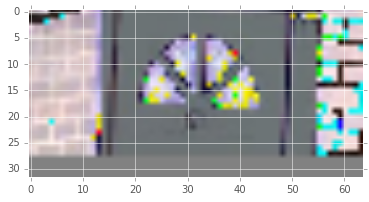

In [161]:
plt.imshow(test_x[0])

In [166]:
np.argmax(test_y[0], axis=-1)

array([ 0,  7,  6, 10, 10], dtype=int64)

In [4]:
train_x, train_y = shuffle(train_x, train_y)
test_x, test_y = shuffle(test_x, test_y)

In [5]:
train_y.shape

(33402,)

In [6]:
pd.Series([len(y.flatten()) for y in train_y]).value_counts()

2    18130
3     8691
1     5137
4     1434
5        9
6        1
dtype: int64

In [7]:
pd.Series([len(y.flatten()) for y in test_y]).value_counts()

2    7037
3    3422
1    2032
4     575
5       2
dtype: int64

In [8]:
train_y_lens = np.array([len(y.flatten()) for y in train_y])
train_y = train_y[train_y_lens <= 5] 
train_x = train_x[train_y_lens <= 5]

In [9]:
def format_labels(y):
    y = np.array([one_hot(_y.flatten()) for _y in y]).reshape([-1])
    return np.array([pad_one_hots(_y) for _y in y])
train_y = format_labels(train_y)
test_y = format_labels(test_y)

In [10]:
valid_x = train_x[:len(train_x)//4]
valid_y = train_y[:len(train_y)//4]
train_x = train_x[len(train_x)//4:]
train_y = train_y[len(train_y)//4:]

In [11]:
import models
import imp
imp.reload(models)

Using TensorFlow backend.


<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

# Shallow Model v1

In [12]:
shallower_model_v1 = models.make_shallower_model_v1(train_x.shape)

In [13]:
[layer.output_shape for layer in shallower_model_v1.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 5),
 (None, 16, 32, 5),
 (None, 16, 32, 15),
 (None, 16, 32, 30),
 (None, 8, 16, 30),
 (None, 8, 16, 15),
 (None, 4, 8, 15),
 (None, 480),
 (None, 400),
 (None, 400),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

1.93 minutes for epoch
capture_performance2(): valid accuracy 0.38802395209580837
Epoch 49
Validation accuracy 38.802%
Mean batch dig loss 0.825
Valid dig loss 0.749


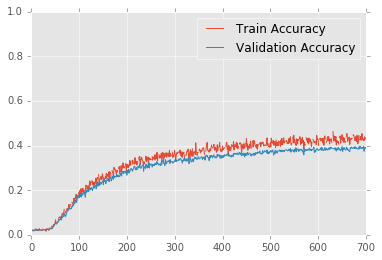

1364.17 minutes total elapsed


In [14]:
shallower_model_v1, train_acc, valid_acc = train_model(shallower_model_v1, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Shallow Model v2

In [16]:
shallower_model_v2 = models.make_shallower_model_v2(train_x.shape)

In [17]:
[layer.output_shape for layer in shallower_model_v2.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 15),
 (None, 32, 64, 30),
 (None, 16, 32, 30),
 (None, 16, 32, 60),
 (None, 16, 32, 90),
 (None, 8, 16, 90),
 (None, 8, 16, 45),
 (None, 4, 8, 45),
 (None, 1440),
 (None, 400),
 (None, 400),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

6.05 minutes for epoch
capture_performance2(): valid accuracy 0.5237125748502994
Epoch 49
Validation accuracy 52.371%
Mean batch dig loss 0.561
Valid dig loss 0.624


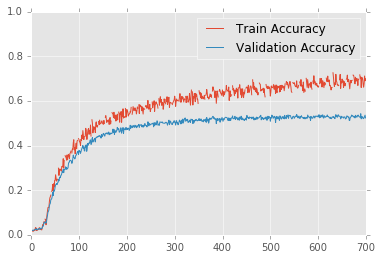

344.78 minutes total elapsed


In [17]:
shallower_model_v2, train_acc3, valid_acc3 = train_model(shallower_model_v2, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model v1

In [18]:
deeper_model_v1 = models.make_deeper_model_v1(train_x.shape)

In [19]:
[layer.output_shape for layer in deeper_model_v1.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 100),
 (None, 4, 8, 50),
 (None, 2, 4, 50),
 (None, 400),
 (None, 800),
 (None, 800),
 (None, 400),
 (None, 400),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

39.16 minutes for epoch
capture_performance2(): valid accuracy 0.6429940119760479
Epoch 49
Validation accuracy 64.299%
Mean batch dig loss 0.270
Valid dig loss 0.568


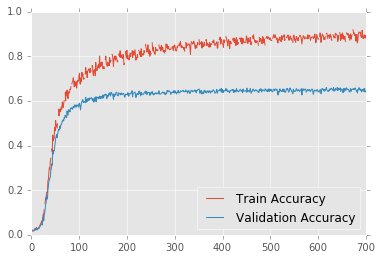

2232.14 minutes total elapsed


In [20]:
deeper_model_v1, train_acc2, valid_acc2 = train_model(deeper_model_v1, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model v2

In [28]:
deeper_model_v2 = models.make_deeper_model_v2(train_x.shape)

In [29]:
[layer.output_shape for layer in deeper_model_v2.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 100),
 (None, 2, 4, 100),
 (None, 800),
 (None, 800),
 (None, 800),
 (None, 300),
 (None, 300),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

48.87 minutes for epoch
capture_performance2(): valid accuracy 0.6438323353293414
Epoch 49
Validation accuracy 64.383%
Mean batch dig loss 0.280
Valid dig loss 0.578


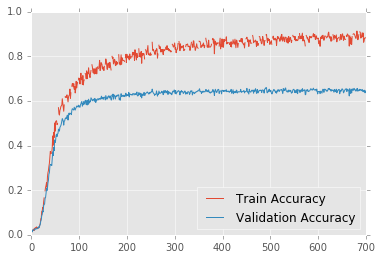

2507.09 minutes total elapsed


In [23]:
deeper_model_v2, train_acc4, valid_acc4 = train_model(deeper_model_v2, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model v3
 * Trying to see why previous deep models failed
 * Increasing number of dense layers by 2 to make it slower descent to 55 nodes

In [30]:
deeper_model_v3 = models.make_deeper_model_v3(train_x.shape)

In [31]:
[layer.output_shape for layer in deeper_model_v3.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 100),
 (None, 2, 4, 100),
 (None, 800),
 (None, 800),
 (None, 800),
 (None, 400),
 (None, 400),
 (None, 200),
 (None, 200),
 (None, 100),
 (None, 100),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

41.27 minutes for epoch
capture_performance2(): valid accuracy 0.19940119760479041
Epoch 32
Validation accuracy 19.940%
Mean batch dig loss 0.744
Valid dig loss 0.775


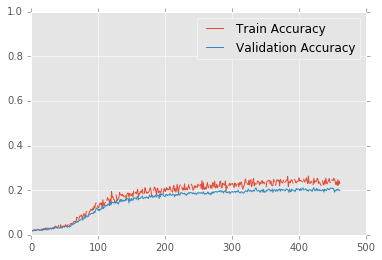

capture_performance2(): valid accuracy 0.19820359281437125
capture_performance2(): valid accuracy 0.1931736526946108
capture_performance2(): valid accuracy 0.20419161676646708
capture_performance2(): valid accuracy 0.19940119760479041
capture_performance2(): valid accuracy 0.20263473053892214
capture_performance2(): valid accuracy 0.20574850299401198


KeyboardInterrupt: 

In [32]:
deeper_model_v3, train_acc5, valid_acc5 = train_model(deeper_model_v3, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model v4
 * Trying to see why previous deep models failed
 * Decreasing number of dense layers by 1 (change from v1) since adding more layers didn't help

In [34]:
deeper_model_v4 = models.make_deeper_model_v4(train_x.shape)

In [35]:
[layer.output_shape for layer in deeper_model_v4.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 100),
 (None, 4, 8, 50),
 (None, 2, 4, 50),
 (None, 400),
 (None, 200),
 (None, 200),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

38.34 minutes for epoch
capture_performance2(): valid accuracy 0.6367664670658683
Epoch 49
Validation accuracy 63.677%
Mean batch dig loss 0.194
Valid dig loss 0.594


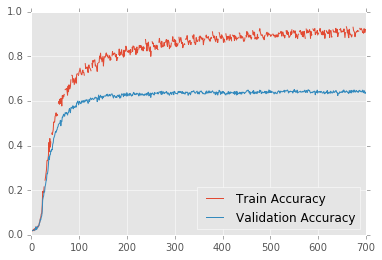

2173.14 minutes total elapsed


In [36]:
deeper_model_v4, train_acc6, valid_acc6 = train_model(deeper_model_v4, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

In [41]:
deeper_model_v4.save('./deeper_model_v4.h5')

# Attempt at FC

In [42]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [43]:
fc_model_v1 = models.make_fc_model_v1(train_x.shape)

In [44]:
[layer.output_shape for layer in fc_model_v1.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 5, 200),
 (None, 2, 5, 100),
 (None, 2, 5, 55),
 (None, 1, 5, 55),
 (None, 5, 55),
 (None, 5, 11),
 (None, 5, 11)]

37.11 minutes for epoch
capture_performance2(): valid accuracy 0.07365269461077845
Epoch 16
Validation accuracy 7.365%
Mean batch dig loss 0.767
Valid dig loss 0.937


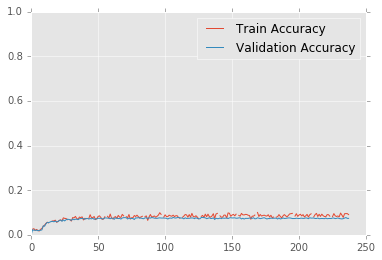

capture_performance2(): valid accuracy 0.07377245508982036
capture_performance2(): valid accuracy 0.07305389221556886
capture_performance2(): valid accuracy 0.07353293413173653
capture_performance2(): valid accuracy 0.07568862275449102
capture_performance2(): valid accuracy 0.07652694610778443
capture_performance2(): valid accuracy 0.07197604790419161
capture_performance2(): valid accuracy 0.07580838323353294


KeyboardInterrupt: 

In [45]:
fc_model_v1, train_acc7, valid_acc7 = train_model(fc_model_v1, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Attempt 2 at FC

In [50]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [51]:
fc_model_v2 = models.make_fc_model_v2(train_x.shape)

In [52]:
[layer.output_shape for layer in fc_model_v2.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 5, 200),
 (None, 2, 5, 200),
 (None, 2, 5, 200),
 (None, 1, 5, 200),
 (None, 5, 200),
 (None, 5, 11),
 (None, 5, 11)]

29.81 minutes for epoch
capture_performance2(): valid accuracy 0.1295808383233533
Epoch 4
Validation accuracy 12.958%
Mean batch dig loss 0.787
Valid dig loss 0.808


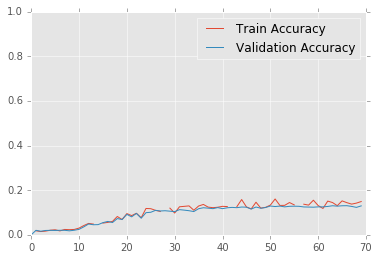

KeyboardInterrupt: 

In [53]:
fc_model_v2, train_acc8, valid_acc8 = train_model(fc_model_v2, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Attempt at FC 3

In [54]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [55]:
fc_model_v3 = models.make_fc_model_v3(train_x.shape)

In [56]:
[layer.output_shape for layer in fc_model_v3.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 5, 200),
 (None, 4, 5, 200),
 (None, 4, 5, 100),
 (None, 2, 5, 100),
 (None, 5, 200),
 (None, 5, 100),
 (None, 5, 11),
 (None, 5, 11)]

32.08 minutes for epoch
capture_performance2(): valid accuracy 0.16766467065868262
Epoch 3
Validation accuracy 16.766%
Mean batch dig loss 0.819
Valid dig loss 0.795


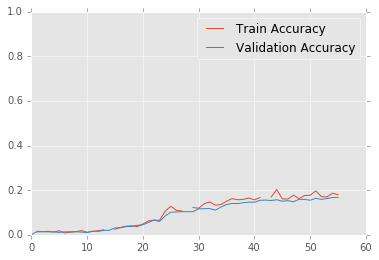

capture_performance2(): valid accuracy 0.1675449101796407
capture_performance2(): valid accuracy 0.16622754491017963
capture_performance2(): valid accuracy 0.1704191616766467
capture_performance2(): valid accuracy 0.16994011976047904
capture_performance2(): valid accuracy 0.17353293413173654
capture_performance2(): valid accuracy 0.17485029940119762
capture_performance2(): valid accuracy 0.1629940119760479


KeyboardInterrupt: 

In [57]:
fc_model_v3, train_acc9, valid_acc9 = train_model(fc_model_v3, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model V5

In [64]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [65]:
deeper_model_v5 = models.make_deeper_model_v5(train_x.shape)

In [66]:
[layer.output_shape for layer in deeper_model_v5.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 5, 200),
 (None, 4, 5, 200),
 (None, 4, 5, 100),
 (None, 2, 5, 100),
 (None, 1000),
 (None, 500),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

30.58 minutes for epoch
capture_performance2(): valid accuracy 0.592814371257485
Epoch 25
Validation accuracy 59.281%
Mean batch dig loss 0.193
Valid dig loss 0.628


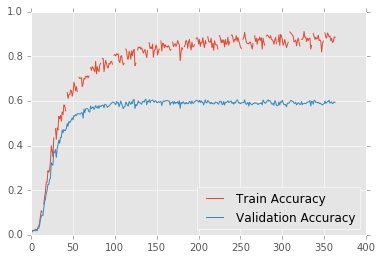

capture_performance2(): valid accuracy 0.59437125748503
capture_performance2(): valid accuracy 0.5920958083832335
capture_performance2(): valid accuracy 0.6077844311377245
capture_performance2(): valid accuracy 0.5935329341317366
capture_performance2(): valid accuracy 0.5940119760479042


KeyboardInterrupt: 

In [67]:
deeper_model_v5, train_acc10, valid_acc10 = train_model(deeper_model_v5, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model V6

In [68]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [69]:
deeper_model_v6 = models.make_deeper_model_v6(train_x.shape)

In [70]:
[layer.output_shape for layer in deeper_model_v6.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 5, 200),
 (None, 4, 5, 200),
 (None, 4, 5, 100),
 (None, 2, 5, 100),
 (None, 1000),
 (None, 500),
 (None, 5, 100),
 (None, 5, 11),
 (None, 5, 11)]

28.72 minutes for epoch
capture_performance2(): valid accuracy 0.02970059880239521
Epoch 10
Validation accuracy 2.970%
Mean batch dig loss 1.097
Valid dig loss 1.127


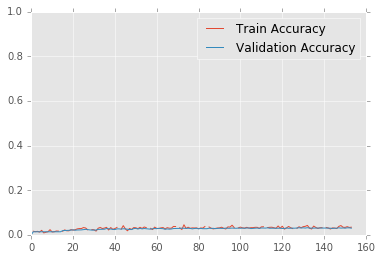

capture_performance2(): valid accuracy 0.02970059880239521
capture_performance2(): valid accuracy 0.029461077844311376
capture_performance2(): valid accuracy 0.02970059880239521
capture_performance2(): valid accuracy 0.029940119760479042
capture_performance2(): valid accuracy 0.028862275449101797
capture_performance2(): valid accuracy 0.02970059880239521
capture_performance2(): valid accuracy 0.029341317365269463
capture_performance2(): valid accuracy 0.029101796407185628


KeyboardInterrupt: 

In [63]:
deeper_model_v6, train_acc11, valid_acc11 = train_model(deeper_model_v6, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=50, 
                                                       batch_size=20)

# Deeper Model V7

In [12]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [13]:
deeper_model_v7 = models.make_deeper_model_v7(train_x.shape)

In [14]:
[layer.output_shape for layer in deeper_model_v7.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 100),
 (None, 4, 8, 50),
 (None, 2, 4, 50),
 (None, 400),
 (None, 200),
 (None, 200),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

41.57 minutes for epoch
capture_performance2(): valid accuracy 0.665868263473054
Epoch 29
Validation accuracy 66.587%
Mean batch dig loss 0.135
Valid dig loss 0.563


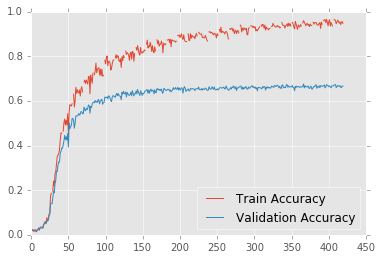

1364.11 minutes total elapsed


In [17]:
deeper_model_v7, train_acc11, valid_acc11 = train_model(deeper_model_v7, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=30, 
                                                       batch_size=20)

# LSTM attempt Version 1

In [26]:
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

In [27]:
lstm_model_v1 = models.make_lstm_model_v1(train_x.shape)

In [28]:
[layer.output_shape for layer in lstm_model_v1.layers]

[(None, 32, 64, 3),
 (None, 32, 64, 5),
 (None, 32, 64, 25),
 (None, 32, 64, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 50),
 (None, 16, 32, 100),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 200),
 (None, 4, 8, 100),
 (None, 4, 8, 50),
 (None, 2, 4, 50),
 (None, 400),
 (None, 200),
 (None, 200),
 (None, 5, 200),
 (None, 5, 11),
 (None, 5, 11)]

39.62 minutes for epoch
capture_performance2(): valid accuracy 0.0
Epoch 7
Validation accuracy 0.000%
Mean batch dig loss 1.743
Valid dig loss 1.700


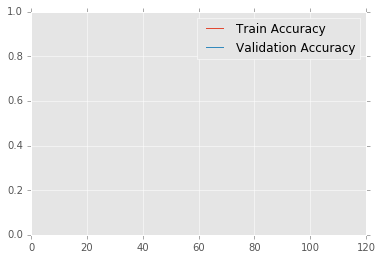

capture_performance2(): valid accuracy 0.0
capture_performance2(): valid accuracy 0.0
capture_performance2(): valid accuracy 0.0
capture_performance2(): valid accuracy 0.0


KeyboardInterrupt: 

In [29]:
lstm_model_v1, train_acc12, valid_acc12 = train_model(lstm_model_v1, train_x, train_y, 
                                                       valid_x, valid_y, n_epochs=30, 
                                                       batch_size=20)

In [30]:
from keras.applications import VGG16

In [34]:
vgg = VGG16()

553402368/553467096 [============================>.] - ETA: 0s

In [59]:
l = vgg.layers[1]

In [69]:
vgg.layers[10].get_config()

{'data_format': 'channels_last',
 'name': 'block3_pool',
 'padding': 'valid',
 'pool_size': (2, 2),
 'strides': (2, 2),
 'trainable': True}

In [55]:
for l in vgg.layers: print('{:<45} {:<22} ->   {:<30}'.format(str(type(l)), str(l.input_shape), str(l.output_shape)))

<class 'keras.engine.topology.InputLayer'>    (None, 224, 224, 3)    ->   (None, 224, 224, 3)           
<class 'keras.layers.convolutional.Conv2D'>   (None, 224, 224, 3)    ->   (None, 224, 224, 64)          
<class 'keras.layers.convolutional.Conv2D'>   (None, 224, 224, 64)   ->   (None, 224, 224, 64)          
<class 'keras.layers.pooling.MaxPooling2D'>   (None, 224, 224, 64)   ->   (None, 112, 112, 64)          
<class 'keras.layers.convolutional.Conv2D'>   (None, 112, 112, 64)   ->   (None, 112, 112, 128)         
<class 'keras.layers.convolutional.Conv2D'>   (None, 112, 112, 128)  ->   (None, 112, 112, 128)         
<class 'keras.layers.pooling.MaxPooling2D'>   (None, 112, 112, 128)  ->   (None, 56, 56, 128)           
<class 'keras.layers.convolutional.Conv2D'>   (None, 56, 56, 128)    ->   (None, 56, 56, 256)           
<class 'keras.layers.convolutional.Conv2D'>   (None, 56, 56, 256)    ->   (None, 56, 56, 256)           
<class 'keras.layers.convolutional.Conv2D'>   (None, 56

In [72]:
test_pred = deeper_model_v7.predict(test_x)

In [75]:
test_pred.shape

(13068, 5, 11)

In [78]:
test_probas = test_pred

In [79]:
test_pred = np.argmax(test_probas, axis=-1)

In [80]:
test_pred

array([[ 3,  3, 10, 10, 10],
       [ 8,  1, 10, 10, 10],
       [ 0, 10, 10, 10, 10],
       ..., 
       [ 1,  1, 10, 10, 10],
       [ 5,  1, 10, 10, 10],
       [ 6,  2, 10, 10, 10]], dtype=int64)

In [81]:
test_y_digits = np.argmax(test_y, axis=-1)

In [85]:
test_pred

array([[ 3,  3, 10, 10, 10],
       [ 8,  1, 10, 10, 10],
       [ 0, 10, 10, 10, 10],
       ..., 
       [ 1,  1, 10, 10, 10],
       [ 5,  1, 10, 10, 10],
       [ 6,  2, 10, 10, 10]], dtype=int64)

In [86]:
test_y_digits

array([[ 6,  6, 10, 10, 10],
       [ 3,  6, 10, 10, 10],
       [ 5,  2, 10, 10, 10],
       ..., 
       [ 0, 10, 10, 10, 10],
       [ 0,  8,  3, 10, 10],
       [ 2,  7, 10, 10, 10]], dtype=int64)

In [83]:
test_pred == test_y_digits

array([[False, False,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False,  True,  True,  True],
       ..., 
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False,  True,  True,  True]], dtype=bool)

In [89]:
np.mean(np.all(test_pred == test_y_digits, axis=-1))

0.0090296908478726661

In [92]:
test_x[0]

array([[[-0.21372549, -0.27647059, -0.27254902],
        [-0.25294118, -0.30392157, -0.27647059],
        [-0.19019608, -0.24509804, -0.18627451],
        ..., 
        [-0.1627451 , -0.24509804, -0.18627451],
        [-0.13529412, -0.21764706, -0.18235294],
        [-0.11176471, -0.20588235, -0.21372549]],

       [[ 0.10392157,  0.08431373,  0.06862745],
        [ 0.14705882,  0.12745098,  0.11568627],
        [ 0.20196078,  0.17058824,  0.1627451 ],
        ..., 
        [-0.11568627, -0.19803922, -0.1627451 ],
        [-0.12352941, -0.21372549, -0.18235294],
        [-0.07254902, -0.18235294, -0.18627451]],

       [[ 0.17843137,  0.13137255,  0.13137255],
        [ 0.15490196,  0.10784314,  0.11568627],
        [ 0.15098039,  0.09215686,  0.11176471],
        ..., 
        [ 0.06078431, -0.04117647, -0.04509804],
        [ 0.07647059, -0.0254902 , -0.02156863],
        [ 0.0372549 , -0.07254902, -0.08431373]],

       ..., 
       [[-0.5       , -0.5       , -0.5       ],
        

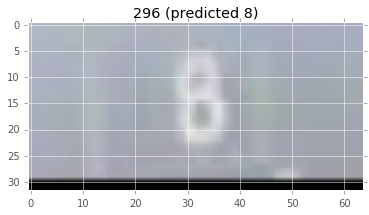

In [155]:
i = 20
plt.imshow((test_x[i]+0.5)*255)
plt.title(''.join(str(dig+1).replace('11','') for dig in test_y_digits[i]) + ' (predicted {})'.format(
    ''.join(str(dig+1).replace('11','') for dig in test_pred[i])))
plt.show()

In [132]:
train_y_digits = np.argmax(train_y, axis=-1)
train_y_pred = np.argmax(deeper_model_v7.predict(train_x), axis=-1)

In [144]:
valid_y_digits = np.argmax(valid_y, axis=-1)
valid_y_pred = np.argmax(deeper_model_v7.predict(valid_x), axis=-1)

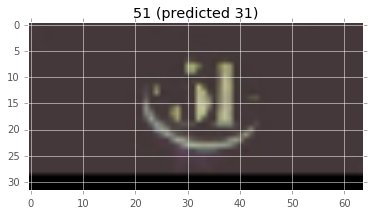

In [151]:
i = 24
plt.imshow((valid_x[i]+0.5)*255)
plt.title(''.join(str(dig+1).replace('11','') for dig in valid_y_digits[i]) + ' (predicted {})'.format(
    ''.join(str(dig+1).replace('11','') for dig in valid_y_pred[i])))
plt.show()

In [119]:
train_x[2].min()

-0.5

# New things to try:
1. Fully convolutional
2. Deep Supervision
3. Highways?